# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
records = 0

print('Beginning Data Retrieval')
print('------------------------')

for i in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q="
    response = requests.get(query_url + i).json()
    try:
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        records += 1
        print("Processing Record {} | {}".format(records, i))
    except:
        print("City not found. Skipping...")
        pass
    
print('------------------------')
print('Data Retrieval Complete')     
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 | chuy
Processing Record 2 | vila franca do campo
Processing Record 3 | new norfolk
Processing Record 4 | cidreira
City not found. Skipping...
Processing Record 5 | geraldton
Processing Record 6 | busselton
Processing Record 7 | tuktoyaktuk
City not found. Skipping...
Processing Record 8 | kyren
Processing Record 9 | bredasdorp
Processing Record 10 | west point
Processing Record 11 | puerto ayora
Processing Record 12 | clyde river
Processing Record 13 | tuatapere
Processing Record 14 | kodiak
Processing Record 15 | kapaa
Processing Record 16 | hermanus
Processing Record 17 | punta arenas
Processing Record 18 | vaini
Processing Record 19 | kavieng
Processing Record 20 | zaysan
Processing Record 21 | roebourne
Processing Record 22 | hasaki
Processing Record 23 | dutse
Processing Record 24 | acapulco
Processing Record 25 | ampanihy
Processing Record 26 | albany
Processing Record 27 | ukiah
Processing Record 28 | pisco
P

Processing Record 225 | coahuayana
Processing Record 226 | rawson
Processing Record 227 | dikson
Processing Record 228 | florianopolis
Processing Record 229 | djibo
Processing Record 230 | solnechnyy
Processing Record 231 | sao joao da barra
Processing Record 232 | broken hill
City not found. Skipping...
Processing Record 233 | barrow
Processing Record 234 | sinnamary
Processing Record 235 | aguimes
Processing Record 236 | lincoln
Processing Record 237 | itoman
Processing Record 238 | east london
Processing Record 239 | upernavik
Processing Record 240 | muros
Processing Record 241 | camabatela
Processing Record 242 | egvekinot
Processing Record 243 | la primavera
Processing Record 244 | ormara
City not found. Skipping...
Processing Record 245 | meru
Processing Record 246 | verkhoyansk
Processing Record 247 | port hedland
Processing Record 248 | banda aceh
Processing Record 249 | eureka
Processing Record 250 | faanui
Processing Record 251 | jalu
Processing Record 252 | acarau
Processing

Processing Record 461 | begunitsy
Processing Record 462 | fort nelson
Processing Record 463 | saint-augustin
Processing Record 464 | mitsamiouli
Processing Record 465 | vila velha
Processing Record 466 | tateyama
Processing Record 467 | myitkyina
Processing Record 468 | cockburn town
Processing Record 469 | altamira
Processing Record 470 | tura
City not found. Skipping...
Processing Record 471 | kruisfontein
Processing Record 472 | mama
Processing Record 473 | moskovskiy
Processing Record 474 | aksu
Processing Record 475 | opotiki
City not found. Skipping...
Processing Record 476 | belmonte
Processing Record 477 | mumford
Processing Record 478 | pokhara
Processing Record 479 | codrington
Processing Record 480 | aljezur
Processing Record 481 | cartagena
Processing Record 482 | roald
Processing Record 483 | norfolk
Processing Record 484 | mingaora
Processing Record 485 | olinda
Processing Record 486 | thompson
Processing Record 487 | ahipara
Processing Record 488 | janakkala
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
City = []
Cloudiness = [] 
Country = []
Date = []
Humidity = []
Lat = []
Lng  = []
Max_Temp = [] 
Wind_Speed = []

weather_df = pd.DataFrame({"City": city,
                        "Cloudiness": cloudiness,
                        "Country": country,
                        "Date": date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                        })
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chui,0,UY,1583037421,88,-33.70,-53.46,291.78,1.97
1,Vila Franca do Campo,40,PT,1583037421,88,37.72,-25.43,290.15,6.70
2,New Norfolk,75,AU,1583037421,49,-42.78,147.06,295.93,4.60
3,Cidreira,0,BR,1583037421,75,-30.18,-50.21,295.87,7.07
4,Geraldton,0,AU,1583037422,33,-28.77,114.60,305.15,8.20


In [5]:
weather_df.to_csv("WeatherCityData.csv", index=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

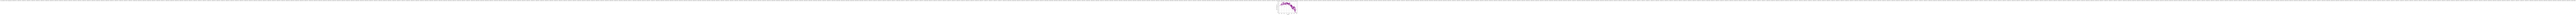

In [6]:
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', c='purple') 
plt.title('City Latitude Vs Max Temperature ({})'.format(date) ) 
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid() 
plt.savefig("Weather_Images/LatitudeVsTemperature.png")

In [7]:
#The plot is analysing the relationship between the city's Latitude and the maximum temperatures experienced trying to visualize the relationship.

#### Latitude vs. Humidity Plot

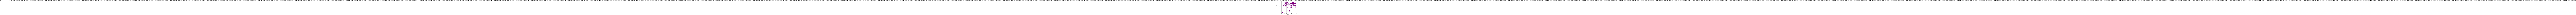

In [8]:
weather_df.plot(kind='scatter',x='Lat',y='Humidity', c='purple') 
plt.title('City Latitude Vs Max Humidity ({})'.format(date) ) 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Weather_Images/LatitudeVsHumidity.png")

In [9]:
#The plot is analysing the relationship between the city's Latitude and the humidity experienced trying to visualize the relationship.

#### Latitude vs. Cloudiness Plot

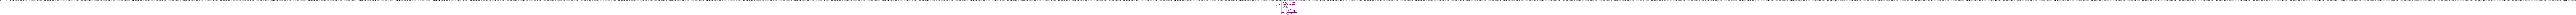

In [10]:
weather_df.plot(kind='scatter',x='Lat',y='Cloudiness', c='purple') 
plt.title('City Latitude Vs Cloudiness ({})'.format(date) ) 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid() 
plt.savefig("Weather_Images/LatitudeVsCloudiness.png")

In [11]:
#The plot is analysing the relationship between the city's Latitude and the cloudiness experienced trying to visualize the relationship.

#### Latitude vs. Wind Speed Plot

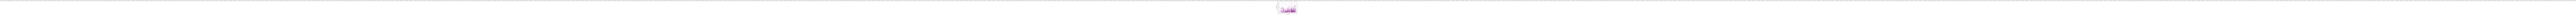

In [12]:
weather_df.plot(kind='scatter',x='Lat',y='Wind Speed', c='purple') 
plt.title('City Latitude Vs Wind Speed ({})'.format(date) ) 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid() 
plt.savefig("Weather_Images/LatitudeVsWindSpeed.png")

In [13]:
#The plot is analysing the relationship between the city's Latitude and the wind speed experienced trying to visualize the relationship.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
nor_hem = weather_df.loc[weather_df["Lat"]>0.01]
sou_hem = weather_df.loc[weather_df["Lat"]<-0.01]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

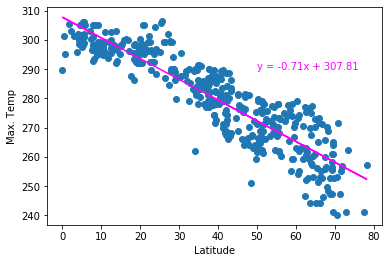

In [16]:
x_values = nor_hem['Lat']
y_values = nor_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"magenta")
plt.annotate(line_eq,(50,290),fontsize=10,color="magenta")

plt.xlabel("Latitude")
plt.ylabel("Max. Temp")
#plt.show()

plt.savefig("Weather_Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

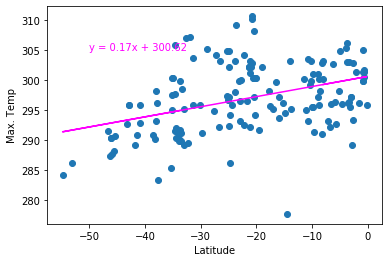

In [17]:
x_values = sou_hem['Lat']
y_values = sou_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"magenta")
plt.annotate(line_eq,(-50,305),fontsize=10,color="magenta")

plt.xlabel("Latitude")
plt.ylabel("Max. Temp")
#plt.show()

plt.savefig("Weather_Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

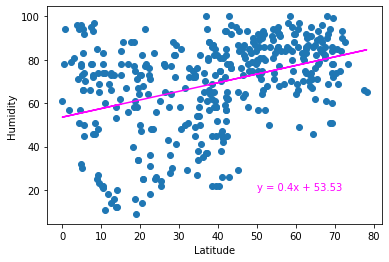

In [18]:
x_values = nor_hem['Lat']
y_values = nor_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"magenta")
plt.annotate(line_eq,(50,20),fontsize=10,color="magenta")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
#plt.show()

plt.savefig("Weather_Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

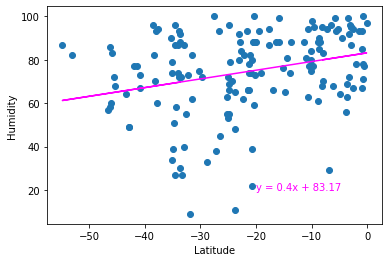

In [19]:
x_values = sou_hem['Lat']
y_values = sou_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"magenta")
plt.annotate(line_eq,(-20,20),fontsize=10,color="magenta")

plt.ylabel("Humidity")
plt.xlabel("Latitude")

#plt.show()

plt.savefig("Weather_Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

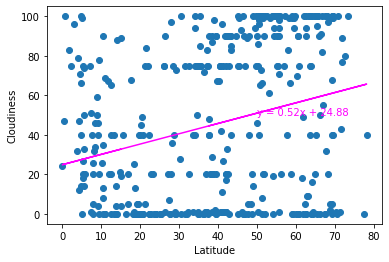

In [20]:
x_values = nor_hem['Lat']
y_values = nor_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"magenta")
plt.annotate(line_eq,(50,50),fontsize=10,color="magenta")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

#plt.show()

plt.savefig("Weather_Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

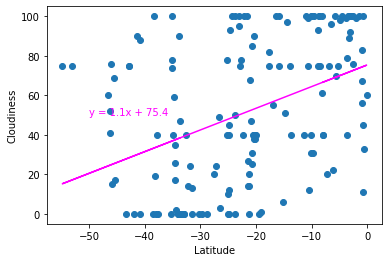

In [21]:
x_values = sou_hem['Lat']
y_values = sou_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"magenta")
plt.annotate(line_eq,(-50,50),fontsize=10,color="magenta")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#plt.show()

plt.savefig("Weather_Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

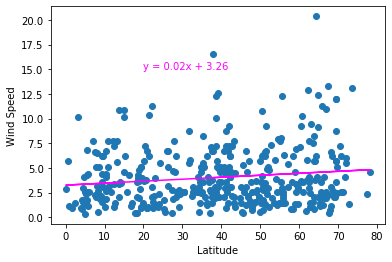

In [22]:
x_values = nor_hem['Lat']
y_values = nor_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"magenta")
plt.annotate(line_eq,(20,15),fontsize=10,color="magenta")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#plt.show()

plt.savefig("Weather_Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

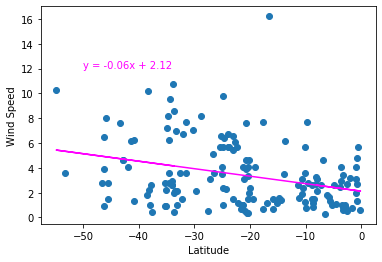

In [23]:
x_values = sou_hem['Lat']
y_values = sou_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"magenta")
plt.annotate(line_eq,(-50,12),fontsize=10,color="magenta")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#plt.show()

plt.savefig("Weather_Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")